# Lab 15 - Logistic Regression Continued and Assessing Classification

The Akimel O'odham people, who were also known as the Pima Indians since European colonization of the US, currently have a high prevalence of diabetes.   The Pima Indian Diabetes dataset contains different possible diabetes indicators and whether the person has diabetes is on [Kaggle](ttps://www.kaggle.com/uciml/pima-indians-diabetes-database) or available from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diabetes.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diabetes.csv)

In this lab, we will look at some futher ways to asses how well a classification method is doing, and learn how to perform logistic regression with multiple input variables.

Import the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from scipy.special import expit
from scipy.stats import logistic

%matplotlib inline

### Section 1: Loading the data and logistic regression on one variable

This section will repeat the logistic regression from Lab 14 that predicted incidence of diabetes from the results of the 2 hour glucose test.

Load the dataset into a dataframe called `diabetes`.

In [2]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diabetes.csv")

Plot a scatter plot of the 2-hour glucose measurement (x) vs. the diabetes outcome (y).

/Users/simon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

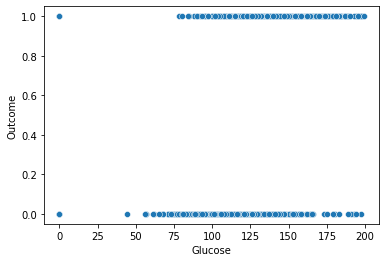

In [6]:
sns.scatterplot(diabetes['Glucose'], diabetes["Outcome"])

Fit a logistic regression model to this data, using Glucose as the independent variable and Outcome as the dependent variable.

In [7]:
logit_model = smf.logit('Outcome ~ Glucose',diabetes).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.526510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      766
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.1860
Time:                        22:26:36   Log-Likelihood:                -404.36
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 4.418e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3501      0.421    -12.713      0.000      -6.175      -4.525
Glucose        0.0379      0.003     11.647      0.000       0.031       0.044
==============================================================================
"""

Let's assess this model by computing the confusion matrix:

In [10]:
logit_model.pred_table()

array([[443.,  57.],
       [138., 130.]])

What type of errors are most likely?

### Section 2: Accuracy, Sensitivity, Specificty, and Precision

Recall that the confusion matrix producted by the statsmodel logistic regression is

<code>   
                        predicted
             |    0           |      1      |
             --------------------------------
observed | 0 | true negative  | false positive
         | 1 | false negative | true positive
</code>

First let's extract the true and false positive and negative values from the confusion matrix and store them in variables so that we can use them in computations.

We will store our confusion matrix in the variable `confusion_matrix`:

In [11]:
confusion_matrix = logit_model.pred_table()
confusion_matrix

array([[443.,  57.],
       [138., 130.]])

The following code gives the values in the upper-left, upper-right, lower-left, and lower-right, respectively.

In [12]:
confusion_matrix[0][0]

443.0

In [13]:
confusion_matrix[0][1]

57.0

In [15]:
confusion_matrix[1][0]

138.0

In [16]:
confusion_matrix[1][1]

130.0

The 0 and 1's in the [] actually refer to the row and column numbers, not the values being predicted.  The top row of the confusion matrix is row 0, and the left-most column is column 0.  

Let's store these values in variables, to make them easier to use.

In [17]:
true_pos = confusion_matrix[0][0]
false_pos = confusion_matrix[1][0]
false_neg = confusion_matrix[0][1]
true_neg = confusion_matrix[1][1]

#### Section 2.1 Accuracy

The *accuracy* of a classification model is proportion of data computed correctly:

$\text{accuracy} = \frac{\text{# of true positives + # of true negatives}}{\text{# of data points}}$

In [18]:
accuracy = (true_pos + true_neg)/len(diabetes)
accuracy

0.74609375

What was the accuracy for this classification model?  Is it what you expected?  

Accuracy can be misleading, especially when the number of data points in each category is unbalanced.  For example, if 90% of your data has category 0 and 10% has category 1, then we can get 90% accuracy by always predicting 0.  But this prediction would be useless. 

#### Section 2.2 Sensitivity

*Sensitivity* or the *true positive rate* is the proportion of data belonging to the positive class that is classified correctly.

$\begin{align}
\text{sensitivity} &= \frac{\text{# of true positives}}{\text{# of actual positives}} \\
&= \frac{\text{# of true positives}}{\text{# of true positives + # of false negatives}}
\end{align}$

In [19]:
sensitivity = true_pos/(true_pos + false_neg)
sensitivity

0.886

What is the sensitivity of our model?  This is the proportion of people with diabetes who are identified correctly as having it.  A test that identifies if someone has a disease should have a very high sensitivity, because we want people who have the disease to test positive.

#### Section 2.3 Specificity

*Specificity* or the *true negative rate* is the proportion of data belonging to the negative class that is classified correctly.  

$\begin{align}
\text{specificity} &= \frac{\text{# of true negatives}}{\text{# of actual negatives}} \\
&= \frac{\text{# of true negatives}}{\text{# of true negatives + # of false positives}}
\end{align}$

In [20]:
specificity = true_neg/(true_neg + false_pos)
specificity

0.48507462686567165

What is the specificity of our model?  This is the proportion of people without diabetes who are identified correctly as not having diabetes.  

The specificity of our model is less than 50%, so our model will predict that a lot of people without diabetes have it.  If specificity is low for a test for a disease, it may not be as bad as a low sensitivity (missing finding the disease in people who have it), but it is still a problem as a positive test result would be stressful and would require more testing to realize the test was wrong.

However, there are situations where a high specificity is more important than a high sensitivity.  For example, if someone is innocent of a crime ("negative") it is more important that they are found innocent in a trial, than that a guilty person ("positive") is found guilty.

#### Section 2.4: Precision

*Precision* is the proportion of positive predictions that are actual positives.

$\begin{align}
\text{precision} &= \frac{\text{# of true positives}}{\text{# of predicted positives}} \\
&= \frac{\text{# of true positives}}{\text{# of true positives + # of false positives}}
\end{align}$

Precision is an important metric for search engines, like Google.  The webpages suggested by Google in response to your search are its positive predictions, and we want as many of them to be relevant (true positives) as possible.

In [21]:
precision = true_pos/(true_pos + false_pos)
precision

0.7624784853700516

What is the precision of our model?

### Section 3: Logistic regression cut-off

By default the confusion matrix uses 0.5 as the cut-off for whether a y value indicates 0  or 1.  We can change that by passing in the new cut-off as a parameter.  For example, to interpret values >= 0.7 as 1 and < 0.7 as 0, use the code:

In [22]:
confusion_matrix = logit_model.pred_table(0.7)
confusion_matrix

array([[484.,  16.],
       [195.,  73.]])

How did the confusion matrix change?  Do you think this new model is better or worse?  Recompute the sensitivity and specificity.

How did the sensitivity and specificity change?  Are they better or worse?

### Section 4: Logistic Regression with Multiple Independent Variables

Let's compute a logistic regression model using all of the columns in the `diabetes` DataFrame except `Outcome` as independent variables.  Can you figure out how to do this with statsmodels? 

Hint:  The command is similar to multi-variable linear regression.

In [23]:
logit_model2 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age", diabetes).fit()
logit_model2.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                  0.2718
Time:                        22:38:18   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -8.4047      0.717    -11.728      0.000      -9.809      -7.000
Pregnancies                  0.1232      0.032      3.840      0.000       0.060       0.186
Glucose                      0.0352      0.004      9.481      0.000       0.028       0.042
BloodPressure               -0.0133      0.005     -2.540      0.011      -0.024      -0.003
SkinThickness                0.0006      0.007      0.090      0.929      -0.013       0.014
Insulin                     -0.0012      0.001     -1.322      0.186      -0.003       0.001
BMI                          0.0897      0.015      5.945      0.000       0.060       0.119
DiabetesPedigreeFunction     0.9452      0.299      3.160      0.002       0.359       1.531
Age                          0.0149      0.009      1.593      0.111      -0.003       0.033
============================================================================================
"""

<details><summary>Answer:</summary>
<code>
logit_model2 = smf.logit("Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age", diabetes).fit()
logit_model2.summary()
</code>
</details>

What is the pseudo R-squared value for this model? Is it an improvement on the model with only `Glucose` as the independent variable?

As with linear regression, we should also look at the p-values of the independent variables.  Are any of the p-values greater than 0.05?  If so, let's create a new logistic regression model without those columns, as they likely do not affect the dependent variable.

In [26]:
logit_model2.pred_table(0.7)

array([[478.,  22.],
       [168., 100.]])

What's the equation for this logistic regression model?

$y = \frac{1}{1 + e^{-(-7.9550 + 0.1535x_1 + 0.0347x_2 + -0.0120x_3 + 0.0848x_4 + 00.9106x_5)}}$
where $x_1$ is the pregnancies variable, $x_2$ is the glucose variable, $x_3$ is the blood pressure variable, $x_4$ is the BMI variable and $x_5$ is the DiabetesPedigreeFunction variable

Compute the confusion matrix for this logistic model:

Do you think this is an improvement over the model based only on glucose?

Compute the sensitivity and specificity for the new model:

How do the sensitivity and specificity compare to the simpler model?  Play around with the cut-off to see what number gives the best results.

### Challenges
- To better understand the data, plot the distributions of the Glucose column for people with diabetes and without diabetes as overlapping histograms.  How does this graph compare to the scatterplot of glucose vs. outcome?  Which gives more information?
- (Very challenging) A *Receiver Operating Characteristic curve* or *ROC curve* gives information about the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) as the cut-off changes.  To plot such a curve, use a loop to compute the true positive rate and false positive rate for multiple cut-offs (eg. 0.1, 0.2, ..., 0.8, 0.9), and plot a line plot of these values with the false positive rate on the x axis and the true positive rate on the y axis.